# theDevMasters, Day 2:<br> Data Preparation and Exploration with Visualization + External Data Acquisition

Company Name : theDevMasters <br>
Author: Cloris Li <br>
Reviewed: Zia Khan <br>
MDS-DL Document Version : 1.0 <br>

Description : Day 2, Data Preparation and Exploration with Visualization + External Data Acquisition

# <font color="blue">Table of Contents</font>

## Data Preparation and Exploration
* Feature Engineering
* Missing Value Imputation
* Creating Dummies

## Data Visualization
* Libraries:
    * Matplotlib
    * Pandas Visualization
    * Seaborn
    * Tableau
* Common used plots:
     * Scatter plot
     * Line chart
     * Histogram
     * Bar chart
     * Box plot
     * Heatmap
     * Pair plot
     * Faceting

## Data Acquisition (External)
* Web Scraping
* APIs

## Hack Project: Election Day
* Project description

# <font color="red">I. Data Preparation and Exploration </font>

### 1.0 Data Collection and Understanding

In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('train.csv')

#### Data Dictionary:
* PassengerId - A numerical id assigned to each passenger
* Survived - Whether the passenger survived (1), or didn't (0). This is going to be the dependent variable of our study
* Pclass - The class the passenger was in - first class (1), second class (2), or third class (3). Pclass is going to be one of the independent variables in our study
* Name - the name of the passenger
* Sex - The gender of the passenger - male or female. Sex is going to be one of the independent variables in our study
* Age - The age of the passenger. Fractional. Age (of age groups) is going to be one of the independent variables in our study
* SibSp - The number of siblings and spouses the passenger had on board
* Parch - The number of parents and children the passenger had on board
* Ticket - The ticket number of the passenger
* Fare - How much the passenger paid for the ticker
* Cabin - Which cabin the passenger was in
* Embarked - Where the passenger boarded the Titanic

### 1.1 Feature Engineering
Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive. Feature engineering can substantially boost machine learning model performance.

#### 1.1.1 Name to Title

In [5]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
# another option:


In [ ]:
# mapping


#### 1.1.2 Family size

In [23]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

### <font color="green">Q: Can you try feature engineering on another feature?</font>

### 1.2 Missing Value Imputation
Different types of missing values:
* Not Missing at Random: NMAR
* Missing at Random: MAR
* Missing Completely at Random: MCAR

There are various ways we can imputate the missing values. We can replace the missing/null values with either of 3 M’s (**Mean/ Mode/ Median**) depending on the possible values of the given column, or simply drop the missing values. We can also fill in missing values using prediction model (such as regression).

#### 1.2.1 missing Age

In [ ]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
# yeni dataframe da degistirme yapiyor
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [22]:
train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    46.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

### <font color="green">Q: How do you decide which of 3'M to use for missing value imputation?</font>

#### 1.2.2 missing Embarked

In [18]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# fill out missing embark with S embark
train['Embarked'] = train['Embarked'].fillna('S')

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### 1.3 Creating Dummies
A dummy variable is a placeholder for a variable that will be integrated over, summed over, or marginalized.   However, in machine learning, it often describes the individual variables in a one-hot encoding scheme. Thus, dummy or Boolean variables are qualitative variables that can only take the value 0 or 1 to indicate the absence or presence of a specified condition.

In [ ]:
train1 = train[['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Embarked', 'Title']]

In [ ]:
train2 = pd.get_dummies(train1, drop_first= True)
train2.head()

### <font color="green">Q: Why should we set "drop_first = True"?</font>

# <font color="red">II. Data Visualization </font>

Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

Python offers multiple great graphing libraries that come packed with lots of different features.

Here we will introduce a few popular plotting libraries:
* Matplotlib: low level, provides lots of freedom
* Pandas Visualization: easy to use interface, built on Matplotlib
* Seaborn: high-level interface, great default styles

### <font color="green">Q: In your own words, why is visualization important?</font>

## 2.0 Import data and graphing libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn
seaborn.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

### <font color="green">Q: What happens if you do not run %matplotlib inline?</font>

## 2.1 Matplotlib
Matplotlib is the most popular python plotting library. It is a low-level library with a Matlab like interface which offers lots of freedom at the cost of having to write more code.

In [7]:
x = np.arange(20)
y = np.random.normal(10, 1, 20)
z = np.random.normal(10, 2, 20)

### <font color="green">Q: Why is it important for all of your data to be the same length?</font>

Text(0, 0.5, 'y')

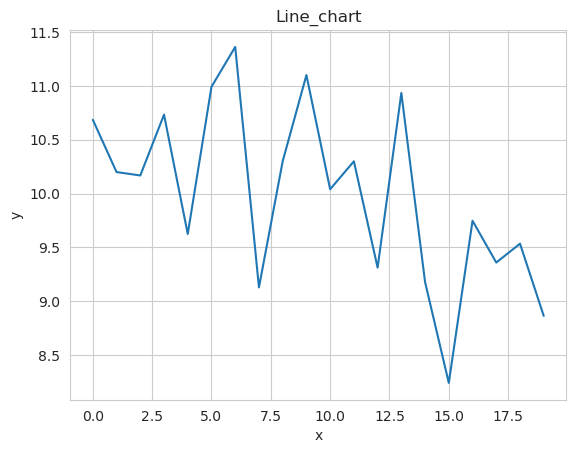

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.set_title('Line_chart')
ax.set_xlabel('x')
ax.set_ylabel('y')

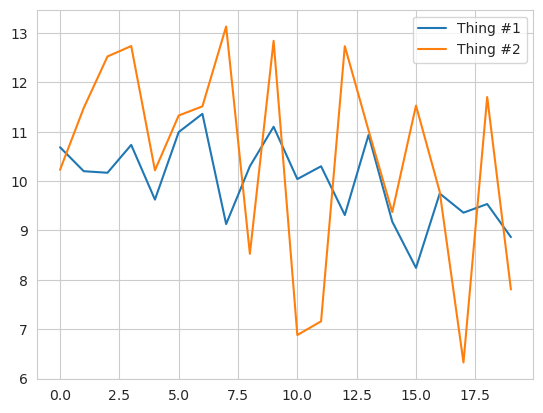

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, label="Thing #1")
ax.plot(x,z, label="Thing #2")
ax.legend()

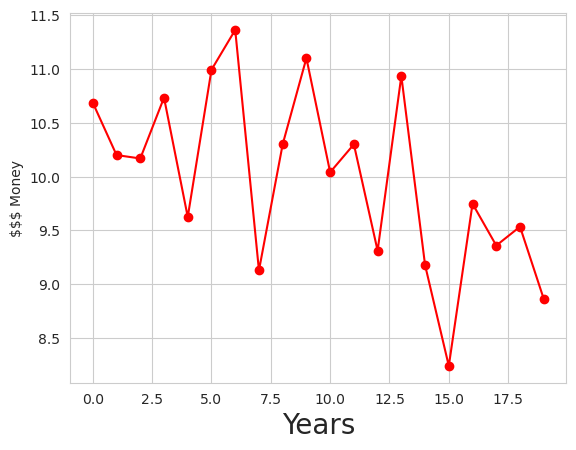

In [10]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,y,marker='o', c='#FF0000')
ax.set_ylabel('$$$ Money', fontsize=10)
ax.set_xlabel('Years', fontsize=20)
fig.savefig('figure.png', dpi=300)

Text(0.5, 0.98, 'Visualization')

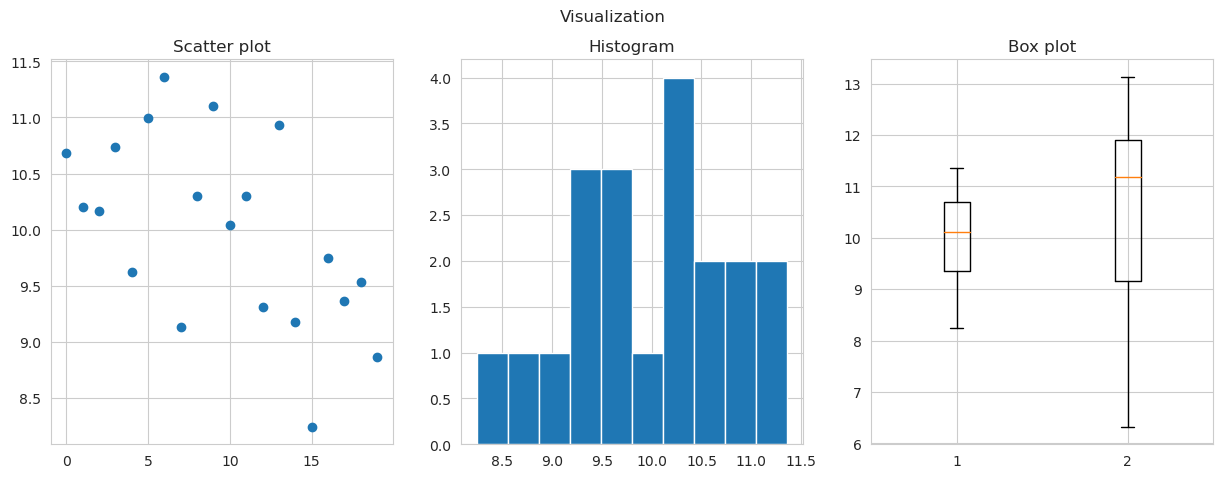

In [11]:
fig2 = plt.figure(figsize = (15,5))
a = fig2.add_subplot(131)
a.scatter(x,y)
a.set_title('Scatter plot')

b = fig2.add_subplot(132)
b.hist(y)
b.set_title('Histogram')

c = fig2.add_subplot(133)
c.boxplot([y,z])
c.set_title('Box plot')

fig2.suptitle('Visualization')

### <font color="green">Q: What is the main difference between a line plot & a scatter plot?</font>

## <font color="green">Exercises</font>
1. Create a figure with 4 subplots.
    1. Histogram of Ages of Titanic
    2. Scatterplot of Age vs Fares
    3. Boxplot of Ages of Survivors vs Deceased
    4. Boxplot of Ages of Men vs Women
2. Interpret each chart you created.
    1. Does it show you anything interesting?
    2. Does it help you figure out who will survive
3. Pick a chart from the matplotlib gallery & recreate it in your notebook.

notMissing = data[data['Age'].notnull()]
ship = plt.figure(figsize = (10,6))
hist = ship.add_subplot(221)
hist.hist(notMissing['Age'])
scatter = ship.add_subplot(222)
scatter.scatter(notMissing['Age'], notMissing['Fare'])
box1 = ship.add_subplot(223)
box1.boxplot([notMissing[notMissing['Survived'] == 0]['Age'],
            notMissing[notMissing['Survived'] == 1]['Age']],
           labels = ['Deceased', 'Survived'])
box2 = ship.add_subplot(224)
box2.boxplot([notMissing[notMissing['Sex'] == 'male']['Age'],
            notMissing[notMissing['Sex'] == 'female']['Age']],
           labels = ['Male', 'Female'])

## 2.2 Pandas Visualization
Pandas is an open source high-performance, easy-to-use library providing data structures, such as dataframes, and data analysis tools like the visualization tools. Pandas Visualization makes it really easy to create plots out of a pandas dataframe and series. It also has a higher level API than Matplotlib and therefore we need less code for the same results.

<AxesSubplot:title={'center':'Scatter plot'}, xlabel='Age', ylabel='Fare'>

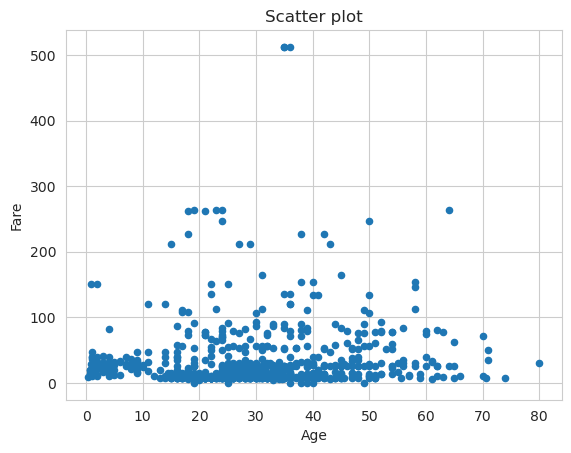

In [12]:
train.plot.scatter(x='Age', y='Fare', title='Scatter plot')

In [ ]:
train[['Age', 'Fare']].plot.line(title='Line chart')

In [ ]:
train['Age'].plot.hist()

In [ ]:
train['Pclass'].value_counts()

<AxesSubplot:>

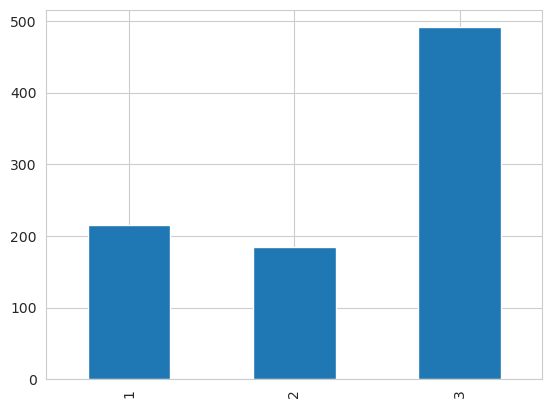

In [13]:
train['Pclass'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

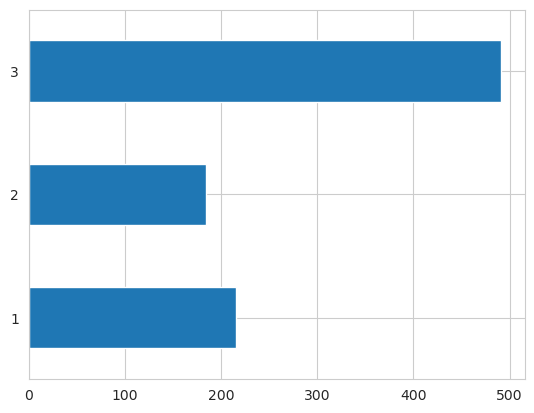

In [15]:
train['Pclass'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

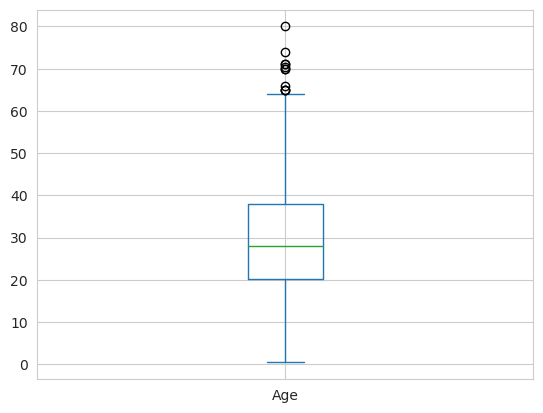

In [14]:
train['Age'].plot.box()

### <font color="green">Q: What do we use a histogram for?</font>

### <font color="green">Q: What do we use a boxplot for?</font>

## 2.3 Seaborn
Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating attractive graphs. Seaborn has a lot to offer. You can create graphs in one line that would take you multiple tens of lines in Matplotlib. Its standard designs are awesome and it also has a nice interface for working with pandas dataframes.

In [16]:
import seaborn as sns
seaborn.set_style('whitegrid')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

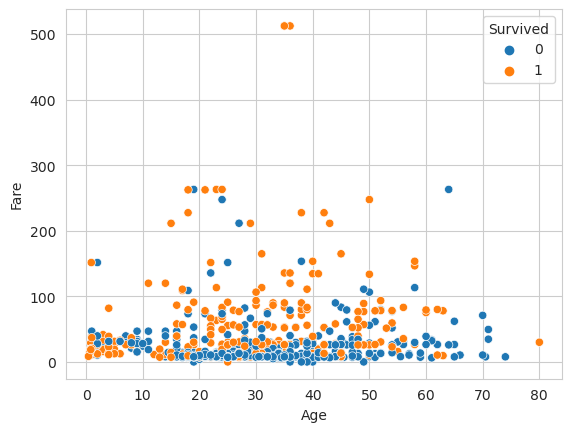

In [17]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)

<AxesSubplot:>

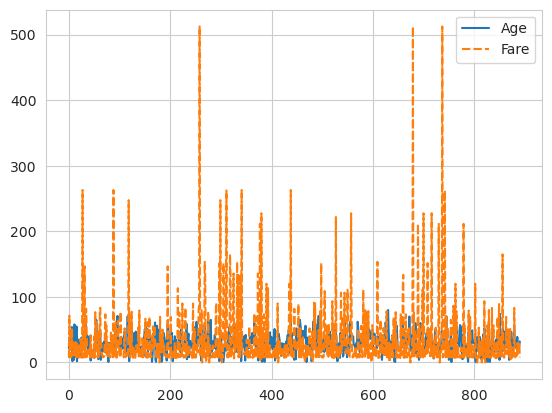

In [24]:
sns.lineplot(data=train[['Age', 'Fare']])

<AxesSubplot:xlabel='Age', ylabel='Density'>

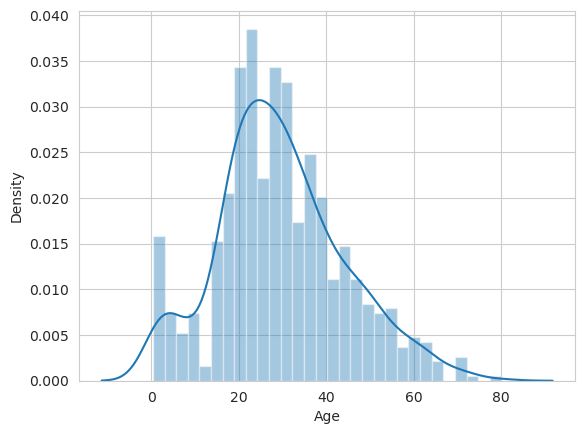

In [25]:
sns.distplot(train['Age'], bins=30, kde=True)

In [26]:
sns.countplot(train['Embarked'])

ValueError: could not convert string to float: 'S'

In [27]:
sns.boxplot('Age', 'Sex', data=train)

TypeError: boxplot() got multiple values for argument 'data'

<AxesSubplot:>

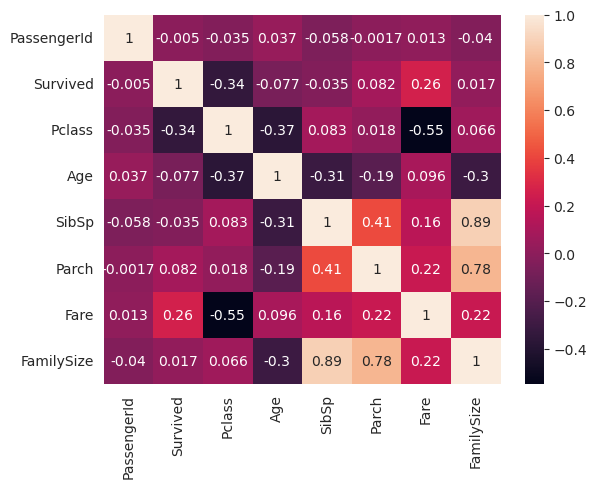

In [28]:
sns.heatmap(train.corr(), annot=True)

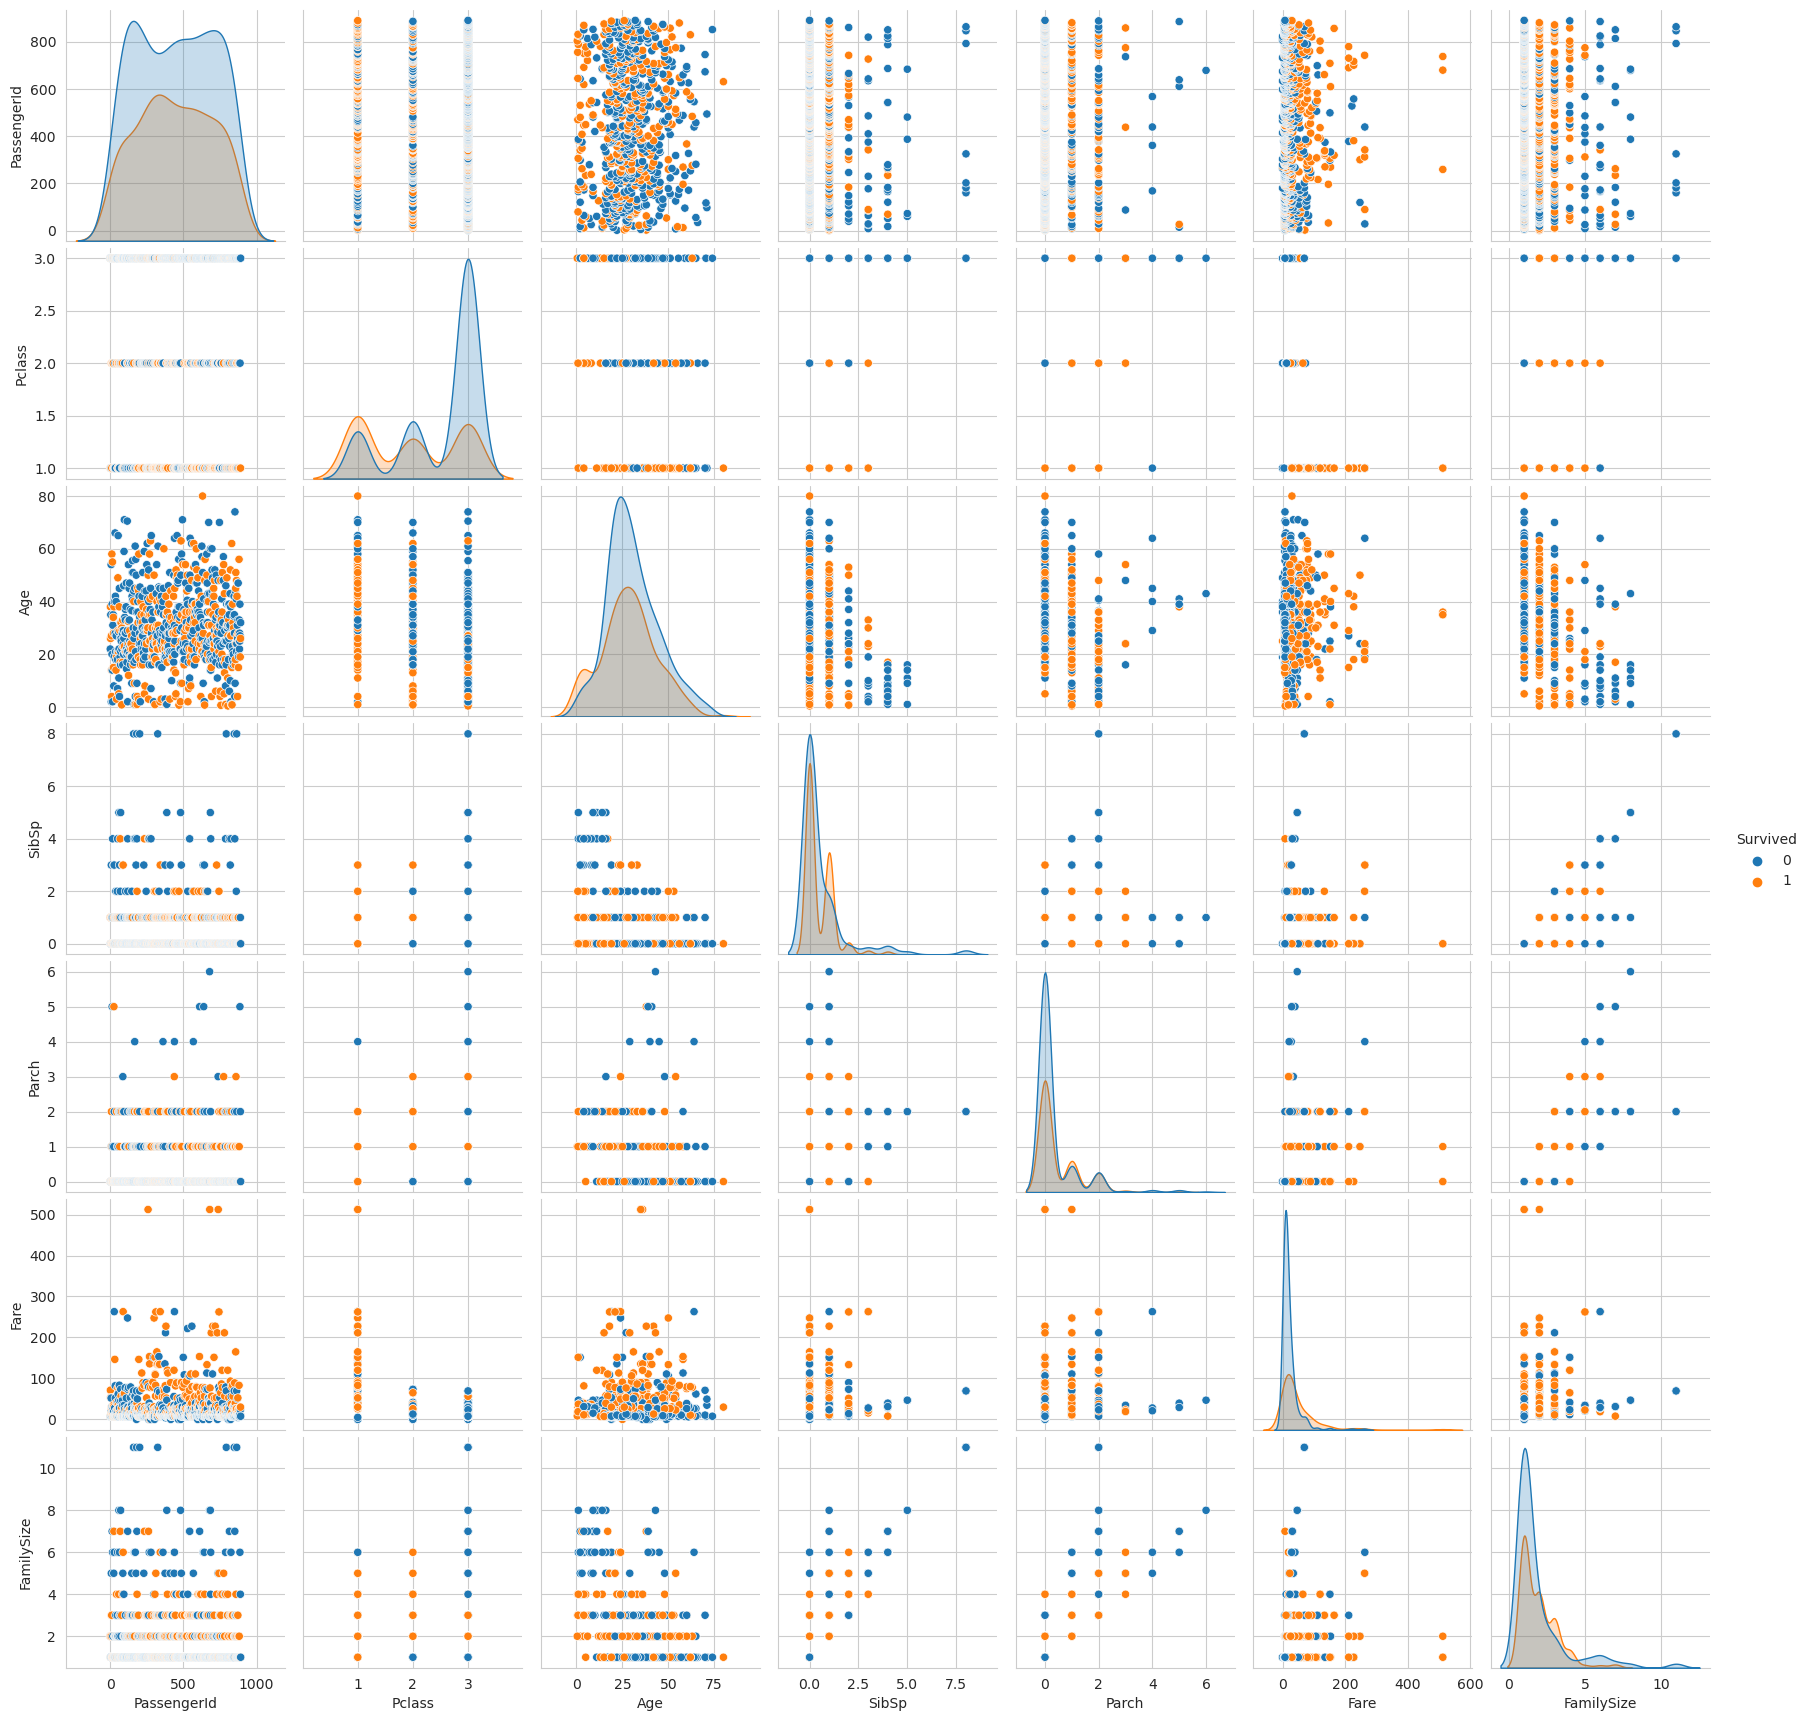

In [29]:
sns.pairplot(train, hue='Survived')
plt.savefig('Pairplot.png')

### <font color="green">Q: Is there anything interesting in the heatmap?</font>

### <font color="green">Q: Is there anything to note from the pair plot?</font>

# <font color="red">III. Data Acqisition (External) </font>

A data analyst or data scientist doesn’t always get data handed to them in a CSV or via an easily accessible database. Sometimes, you’ve got to go out and get the data you need. The ability to collect unique data sets can really set you apart from the pack, and being able to access APIs and scrape the web for new data stories is the best way to get data nobody else is working with.

## 3.1 Web Scraping
Web scraping consists in gathering data available on websites. This can be done manually by a human user or by a bot.

Web scrapers gather website data in the same way a human would do it: the scraper goes onto a web page of the website, gets the relevant data, and move forward to the next web page. Every website has a different structure, that is why web scrapers are usually built to explore one website.

Websites are created using HTML (Hypertext Markup Language), along with CSS (Cascading Style Sheets) and JavaScript. HTML elements are separated by tags and they directly introduce content to the web page.

BeautifulSoup will be used here to parse the HTML files. It is one of the most used library for web scraping. Its is quite simple to use and has many features that help gathering websites data efficiently. (Documentation see: https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


### <font color="green">Q: When can you not webscrap a page?</font>

In [ ]:
url = 'https://www.coinmarketcap.com'

### <font color="green">Q: What part of the webpage do we want?</font>

In [ ]:
from bs4 import BeautifulSoup

### <font color="green">Q: What is the equivalent of a BeautifulSoup object?</font>

In [ ]:
coinNames = s.find_all('span', attrs={'class': 'currency-symbol'})
coinNames = [x.text for x in coinNames]

fullName = s.find_all('a', attrs={'class':'currency-name-container'})
fullName = [x.text for x in fullName]

MarketCap = s.find_all('td', attrs={'class':'no-wrap market-cap text-right'})
MarketCap = [x.text.split('\n')[1].split('$')[1] for x in MarketCap]    



In [ ]:
import pandas as pd
results = pd.DataFrame(columns = ['Prefix', 'Coin Name', 'Market Cap', 'Current Price'])


In [ ]:
import datetime as dt


## 3.2 API Pulls
“An application program interface (API) is code that allows two software programs to communicate with each other. The API defines the correct way for a developer to write a program that requests services from an operating system (OS) or other application.” — TechTarget

API is actually a very simple tool that allows anyone to access information from a given website.

http://www.pythonforbeginners.com/api/list-of-python-apis

### <font color="green">Q: Which API is your most interested API listed there so far?</font>

In [ ]:
#!pip install coinmarketcap

In [ ]:
from coinmarketcap import Market


### JSON：
JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate.

**json** library is needed so that we can work with the JSON content we get from the API. In this case, we get a dictionary for each Channel’s information such as name, id, views and other information.

### <font color="green">Q: Where do we see JSON objects the most?</font>

In [4]:
import json

In [ ]:
zoo = """
{
    "zoo_animal":"Lion",
    "food":["Meat", "Veggies", "Honey"],
    "fur":"Golden",
    "clothes": null,
    "diet":[{"zoo_animal":" Gazelle", "food":"grass", "fur":"Brown"}]
}
"""

### <font color="green">Q: What is the equivalent of a JSON object in Python?</font>

# <font color="red">IV. Hack Project: Election Day </font>

In this project, we will analyze Poll datasets.
1. Who was being polled and what was their party affiliation?
2. Did the poll results favor Romney or Obama?
3. How do undecided voters effect the poll?
4. Can we account for the undecided voters?
5. How did voter sentiment change over time?
6. Can we see an effect in the polls from the debates?